In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys
import time

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env1 = gym.envs.make('CartPole-v0')
env2 = gym.envs.make("MountainCar-v0")

In [81]:
observation = env1.reset()
#action = env.action_space.sample()
#observation, reward, done, info = env.step(action)
tuple(observation)

(-0.0023083014149351405,
 -0.032300275852294266,
 0.0097685883580541852,
 -0.041854044092364706)

# Demo1: Q-learning with Function Approximation Cartpole

In [4]:
%load_ext autoreload
%autoreload 2
from FA_q_learning import Estimator, make_epsilon_greedy_policy, q_learning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
estimator = Estimator(env1)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [6]:
env1.observation_space.low[2]

-0.41887902047863906

## Fit non-linear estimator 

In [ ]:
stats = q_learning(env1, estimator, 1000, epsilon=0.0)

Episode 550/1000 (9.0))

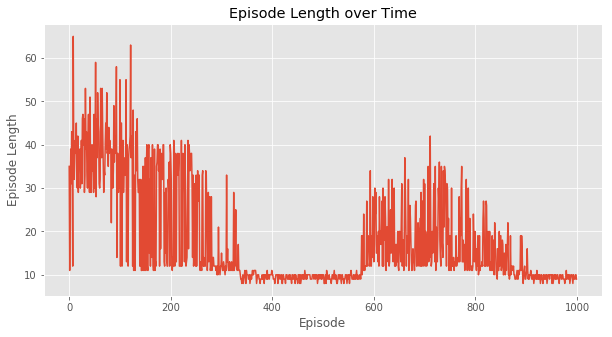

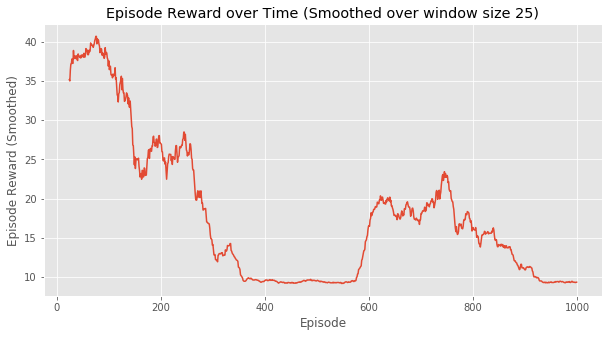

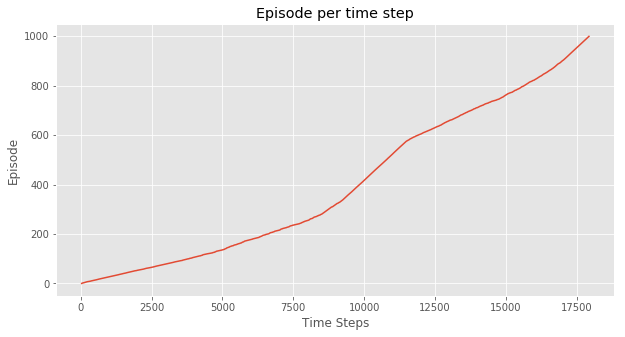

(<matplotlib.figure.Figure at 0x11652c6d8>,
 <matplotlib.figure.Figure at 0x1117aa828>)

In [87]:
#plotting.plot_value_function_cartpole(env1, estimator)
plotting.plot_episode_stats(stats, smoothing_window=25)

## Devastating result...

In [55]:
policy = make_epsilon_greedy_policy(estimator,0.0, env1.action_space.n)

### Balancing the pole doesn't work

In [1]:
env1.reset()
for i_episode in range(5):
    state = env1.reset()
    for t in range(100):
        env1.render()
        time.sleep(0.1)
        #print(observation)
        state = tuple(round(i,1) for i in state)
        probabilities = policy(state)
        action = np.random.choice(np.arange(len(probabilities)),p=probabilities)
        state, reward, done, info = env1.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
        if t == 99:
            print("Episode finished after 100 timesteps")

NameError: name 'env1' is not defined